In [ ]:
import fastai.vision.all as fv
from pathlib import Path
import pandas as pd


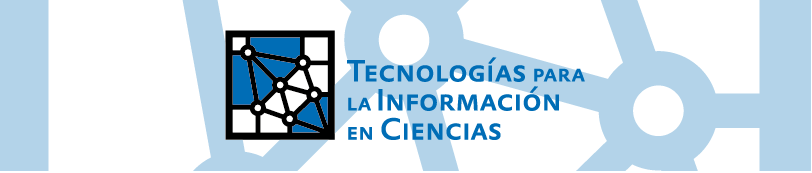   

### Tarea Classificador de Animales
Zamorano Presa Miguel Ángel  
Redes Neuronales

In [ ]:
import fastai.vision.all as fv

In [ ]:
fv??

Type:        module
String form: <module 'fastai.vision.all' from '/home/sistemas/.local/lib/python3.10/site-packages/fastai/vision/all.py'>
File:        ~/.local/lib/python3.10/site-packages/fastai/vision/all.py
Source:     
from . import models
from ..basics import *
from ..callback.all import *
from .augment import *
from .core import *
from .data import *
from .models.all import *
from .learner import *
from .utils import *


In [ ]:
df = pd.read_csv("/home/sistemas/mtics/nn/AnimalsSmall/train.csv")

In [ ]:
df.head(5)

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [ ]:
df.Animal.unique()

array(['hippopotamus', 'squirrel', 'grizzly+bear', 'ox',
       'german+shepherd', 'buffalo', 'otter', 'bobcat', 'wolf',
       'persian+cat', 'collie', 'antelope', 'seal', 'dalmatian',
       'siamese+cat', 'moose', 'horse', 'killer+whale', 'mouse', 'walrus',
       'beaver', 'rhinoceros', 'chimpanzee', 'weasel', 'spider+monkey',
       'raccoon', 'rat', 'chihuahua', 'mole', 'bat'], dtype=object)

In [ ]:
imagess = Path("/home/sistemas/mtics/nn/AnimalsSmall/images")

In [ ]:
files =fv.get_image_files(imagess);files

(#13000) [Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-6189.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-10175.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-7619.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-12241.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-7663.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-4605.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-1410.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-5009.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-11846.jpg'),Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-1683.jpg')...]

In [ ]:
files[0]

Path('/home/sistemas/mtics/nn/AnimalsSmall/images/Img-6189.jpg')

In [ ]:
"""
Opté por revisar la documentación ,aprendí que fastai tiene metodos de alto nivel que permiten ahorrarte preprocesamiento laborioso
en nuestro casó el mejor de los métodos fue fv.ImageDataLoaders.from_df() que te regresa un objeto que contiene los dataloaders de entranamiento y test
tuve problemas al momento de debugguear porque no había documentación muy fea en los foros oficiales
"""

def load_data(dff,imagess, img_size, batch_size):

    tfms = fv.aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.3,max_zoom=1.2,max_warp=0.2)

    data = fv.ImageDataLoaders.from_df(dff,
                                    blocks = (fv.ImageBlock,fv.CategoryBlock),
                                    path="/home/sistemas/mtics/nn/AnimalsSmall/images",
                                    fn_col='Image_id', label_col='Animal',
                                    bs=batch_size,
                                    valid_pct=0.2,
                                    batch_tfms=tfms,
                                    item_tfms = fv.Resize(img_size))


    return data


In [ ]:
data = load_data(df,imagess,img_size=128,batch_size=256);data[0]

In [ ]:
for x,y in data[0]:
  print(x.shape,y.shape)
  break

torch.Size([256, 3, 128, 128]) torch.Size([256])


In [ ]:
y

TensorCategory([18, 11, 23,  4, 10,  5, 17, 26, 27,  9,  4, 12,  6, 12, 21,  3,
                12, 18, 26,  2,  7, 14, 26, 11,  8, 10, 12,  3, 12, 17, 12, 16,
                18, 21, 10,  7, 24, 12, 25, 23, 24, 26, 13,  8,  5, 13, 15,  7,
                27,  5, 23,  7, 27, 24, 12,  4,  7, 11, 10,  7,  7, 23,  7, 29,
                 5, 19,  3,  9, 10,  7,  5,  6, 13,  1,  9,  0,  1, 23, 22,  7,
                17, 29,  6, 12, 17, 15,  7, 28, 11, 22, 25, 10, 26,  4, 15,  5,
                19, 11,  1, 17,  0, 26, 23, 10,  4,  3, 15, 29, 10, 16,  7, 12,
                 9,  7,  9,  5, 15, 26, 12, 13,  6,  4,  0,  5, 18,  8, 14, 15,
                 8, 26, 12,  6,  9, 15, 18, 25, 17, 15, 22, 18, 23,  4, 15, 25,
                23, 10, 23, 29, 17, 10,  9, 29, 19, 19, 10,  4,  4, 12, 25, 26,
                12, 26,  5, 11, 10, 21, 26, 15, 23, 17, 11, 12,  7,  0, 23, 28,
                18, 21, 23,  5,  6, 17, 20, 11, 11, 19,  0,  8, 15, 26, 23, 19,
                20,  0, 23, 13, 24, 18, 

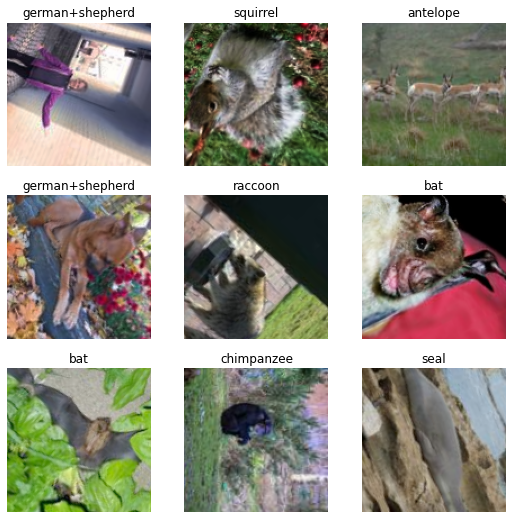

In [ ]:
data.show_batch()

In [ ]:
# y como nos enseñó el profe,declaramos los parametros
"""
el objeto dataloader
el modelito
las metricas
y el optimizador

para crear el objeto learner que almacena los requisitos que queremos y que tiene el metodo para mandar a llamar al fit que es el entrenador
"""

learn = fv.vision_learner(data,
                          fv.resnet18,
                          metrics=fv.accuracy,
                          opt_func=fv.ranger)

/home/sistemas/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sistemas/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/sistemas/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M 

SuggestedLRs(valley=0.005248074419796467)

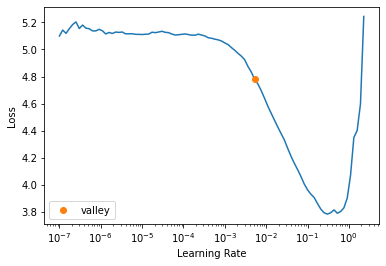

In [ ]:
#profe nos explicó que la tasa de aprendizaje óptima la calcula el metodo lr.find()
#aunque como uso fit one cycle en realidad la tasa se convierte en una dinámica
learn.lr_find()

In [ ]:

learn.fit_one_cycle(10,2e-2,div=2,pct_start=0.7,div_final=1000)
"""
dado que hicimos onecycle podemos ver como fue la varianción durante las 10 epocas
y al final nos dió un accuracy del 78.9%
"""

epoch,train_loss,valid_loss,accuracy,time
0,2.907346,1.056338,0.729615,03:23
1,2.008523,0.876908,0.757692,03:29
2,1.606787,0.758797,0.780000,03:24
3,1.417510,1.030961,0.712692,03:23
4,1.331187,1.051767,0.714615,03:12
5,1.303948,0.813071,0.759231,03:12
6,1.276161,1.133468,0.691154,02:55
7,1.234396,0.891728,0.735385,02:57
8,1.143968,0.706941,0.779231,03:25
9,1.044962,0.681902,0.789231,03:07


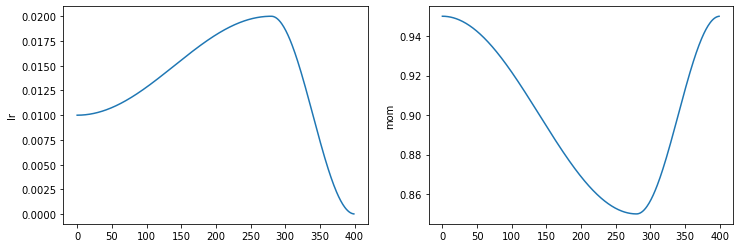

In [ ]:
learn.recorder.plot_sched() # nos enseña la evolución de lr y el momentum a lo largo del aprendizaje

In [ ]:
learn.summary()

Sequential (Input shape: 256 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     256 x 64 x 64 x 64  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     256 x 64 x 32 x 32  
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.model[-1] # para ver la última capa del modelo

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): fastai.layers.Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=30, bias=False)
)

In [ ]:
learn.model[-1][-1].weight.shape # nos da la dimension del tensor de la ultima capa

torch.Size([30, 512])

In [ ]:
learn.opt_func # valores de nuestro optimizador

<function fastai.optimizer.ranger(params: 'Tensor | Iterable', lr: 'float | slice', mom: 'float' = 0.95, wd: 'Real' = 0.01, eps: 'float' = 1e-06, k: 'int' = 6, alpha: 'float' = 0.5, *, sqr_mom: 'float' = 0.99, beta: 'float' = 0.0, decouple_wd: 'bool' = True) -> 'Lookahead'>

In [ ]:
learn.save('modelito')

Path('/home/sistemas/mtics/nn/AnimalsSmall/images/models/modelito.pth')

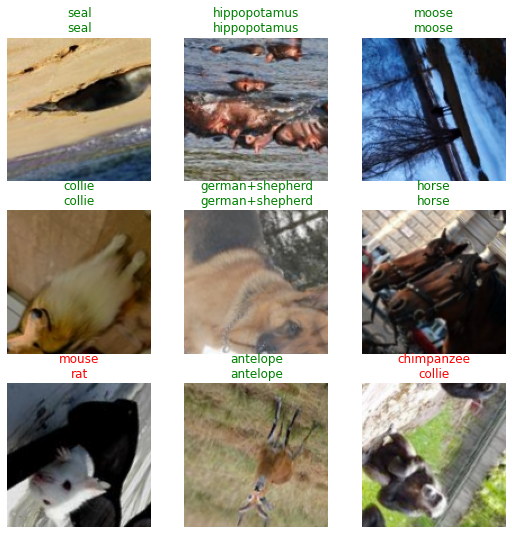

In [ ]:
learn.show_results(ds_idx=3,dl=data.train,shuffle=True) # un snapshot de  resultados

In [ ]:
interp = fv.ClassificationInterpretation.from_learner(learn)

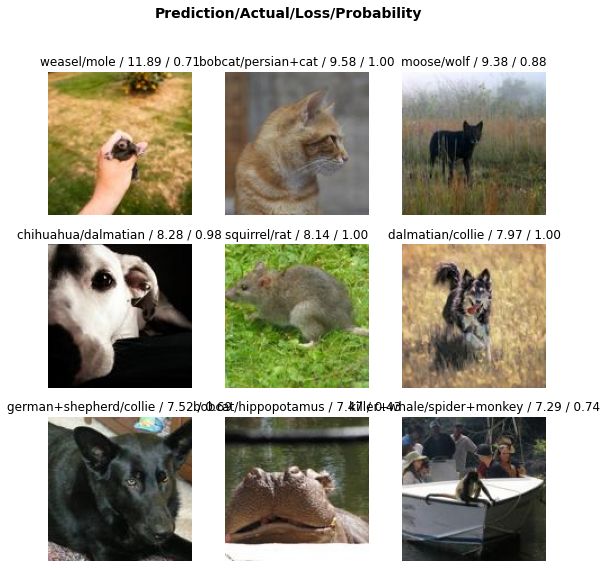

In [ ]:
interp.plot_top_losses(9) # los top 9 peores  que nuestro modelito más batalló

In [ ]:
interp.most_confused(1) # los top pares mas condudiso por nuestro modelo

[('beaver', 'otter', 13),
 ('siamese+cat', 'persian+cat', 12),
 ('german+shepherd', 'chihuahua', 11),
 ('german+shepherd', 'collie', 9),
 ('german+shepherd', 'horse', 9),
 ('buffalo', 'moose', 8),
 ('collie', 'german+shepherd', 8),
 ('horse', 'buffalo', 8),
 ('otter', 'seal', 8),
 ('wolf', 'bobcat', 8),
 ('collie', 'horse', 7),
 ('raccoon', 'bobcat', 7),
 ('antelope', 'horse', 6),
 ('bat', 'horse', 6),
 ('chihuahua', 'german+shepherd', 6),
 ('horse', 'ox', 6),
 ('chimpanzee', 'ox', 5),
 ('german+shepherd', 'wolf', 5),
 ('moose', 'ox', 5),
 ('persian+cat', 'raccoon', 5),
 ('persian+cat', 'rat', 5),
 ('seal', 'walrus', 5),
 ('weasel', 'raccoon', 5),
 ('weasel', 'squirrel', 5),
 ('grizzly+bear', 'otter', 4),
 ('mouse', 'rat', 4),
 ('otter', 'hippopotamus', 4),
 ('ox', 'rhinoceros', 4),
 ('persian+cat', 'bobcat', 4),
 ('persian+cat', 'siamese+cat', 4),
 ('raccoon', 'squirrel', 4),
 ('rat', 'mouse', 4),
 ('seal', 'killer+whale', 4),
 ('walrus', 'seal', 4),
 ('weasel', 'mouse', 4),
 ('bat', 